# Imports

In [8]:
# Ajouter chemin système pour naviguer d'un dossier à l'autre facilement
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))

In [9]:
pip install plot-keras-history


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
########## Imports ##########
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import time

from packages import fonctions

%matplotlib inline
import os
from os import listdir
from glob import glob

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn import manifold, decomposition
from sklearn import cluster, metrics
from tensorflow.keras.optimizers.legacy import Adam

#pip install plot-keras-history
from plot_keras_history import show_history, plot_history

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# tensorflow
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# os.environ["TF_KERAS"]='1'
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [11]:
# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

In [12]:
# Choix d'une palette de couleurs

sns.set_palette('Set2', color_codes = True)
print(sns.color_palette('Set2').as_hex())
# palettes testées : 'Spectral', 'flare', 'twilight', 'husl', 'Set1', 'Set2', 'Set3'
#sns.set_style('darkgrid')
sns.color_palette()

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

# Préparation des données

In [13]:
########## Import données csv ##########
# dossier data hors du dossier code pour ne pas l'importer dans github

df = pd.read_csv('../../data/flipkart_com-ecommerce_sample_1050.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [14]:
# Dictionnaire des catégories (pour réduire le nombre de catégories - cf notebook Data_exploration_EDA)
dict_categories = {
    'Home and Kitchen Essential' : [
        'Home Furnishing', 'Tray Sets', 'Coffee Mugs', 'Lunch Boxes', 'Caffeine Bowls', 'Water bottle', 'Omic Sippers', 'Kitchen Tools', 'Bar Accessories', 'Bar Glasses', 'Idli Makers', 'Craft Jugs', 'Table Clocks', 'Bhalaria Forks', 'Kitchen Containers'],
    'Baby and Personal Care' : [
        'Baby Care', 'Personal Care'],
    'Electronics and Accessories' : [
        'Wrist Watches', 'Network Components', 'Tablet Accessories', 'Laptop Accessories', 'Pen Drives', 'Computer Components'],
    'Festive and Special Occasion' : ['Festive Needs', 'BFT Bulbs']
}

In [15]:
# Extraire catégories de la feature 'product_category_tree' et réduire nombre de catégories en utilisant le dictionnaire ci dessus
df['category'] = df.apply(fonctions.get_category, axis = 1)
inverse = { v: k for k, l in dict_categories.items() for v in l }
df['category_4'] = df['category'].map(inverse)
df['category_4'].value_counts()

category_4
Baby and Personal Care          300
Electronics and Accessories     292
Home and Kitchen Essential      263
Festive and Special Occasion    151
Name: count, dtype: int64

In [16]:
df = df[['category_4', 'description']]
df.columns = ['category', 'description']
df.shape

(1050, 2)

In [17]:
df['category'].unique().tolist()

['Home and Kitchen Essential',
 'Baby and Personal Care',
 'Electronics and Accessories',
 'Festive and Special Occasion',
 nan]

In [18]:
path = '../../data/Images/'

data_path = glob(path + '**.jp*')

data = fonctions.data_fct(df, data_path)[:700]
data_test = fonctions.data_fct(df, data_path)[700:]

le = preprocessing.LabelEncoder()
le.fit(data['label_name'])
data['label'] = le.transform(data['label_name'])
data_test['label'] = le.transform(data_test['label_name'])
# data.head(5)
data_test.head(5)

1050
1050


,image_path,label_name,label
700,../../data/Images/6c53dbd7a9d43744920bfae3bc06...,Home and Kitchen Essential,3
701,../../data/Images/672d1c3272eae4586eb5994fe408...,Home and Kitchen Essential,3
702,../../data/Images/72db37ec42ee76d79cf395221e0f...,Festive and Special Occasion,2
703,../../data/Images/0ae859a69c7608d8197c3ba8c37b...,Home and Kitchen Essential,3
704,../../data/Images/66b75f053cb7626f49f1a9bffe77...,Home and Kitchen Essential,3


In [19]:
data.groupby('label').count()

,image_path,label_name
label,,
0,197,197
1,219,219
2,102,102
3,140,140
4,42,0


In [20]:
df_nan = data.loc[data['label_name'].isna()]
df_nan

,image_path,label_name,label
52,../../data/Images/8f41c6931b5220c2bb34d1cab21c...,NaN,4
86,../../data/Images/170fdf050c7a1f8d30ef5a98c421...,NaN,4
87,../../data/Images/f9a8320c182841024f47ebcba284...,NaN,4
115,../../data/Images/cf2ba696547459733c6bbfad4e3b...,NaN,4
234,../../data/Images/52877a6306aef18af67ab54c8233...,NaN,4
238,../../data/Images/f01140c02fd09e5c56312a64fa8d...,NaN,4
240,../../data/Images/de911421573d3e234450040374b5...,NaN,4
241,../../data/Images/ae03731c3482a5e42d040dbf723c...,NaN,4
242,../../data/Images/63523a600ab69f276664d0eade9d...,NaN,4
243,../../data/Images/32cf0691248297655e2c1728b12e...,NaN,4


In [21]:
# drop nan ici - visualiser les images rapidement
data.dropna(inplace = True)

In [22]:
data.loc[data['label_name'].isna()]

,image_path,label_name,label


In [23]:
data.reset_index(drop = True, inplace = True)

In [24]:
# essayer de les classifier à la fin quand mon modèle sera au point et vérifier visuellement

Home and Kitchen Essential


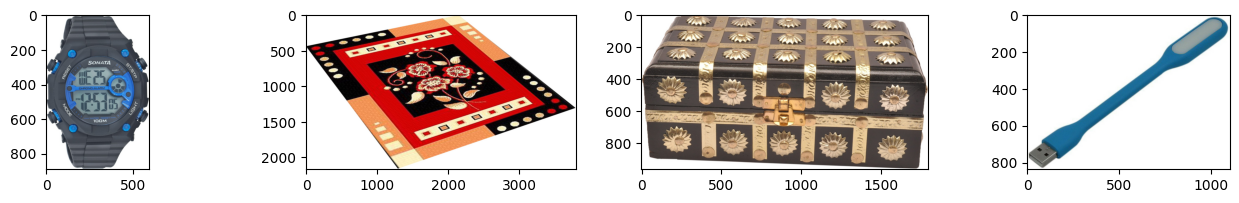

Baby and Personal Care


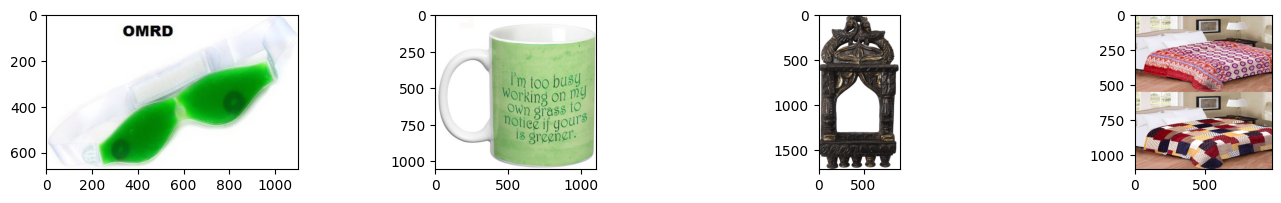

Electronics and Accessories


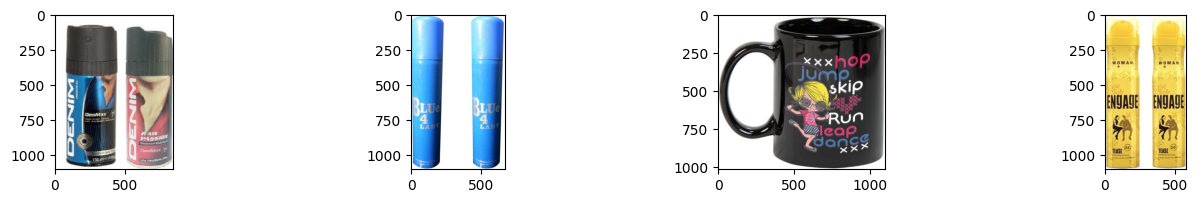

Festive and Special Occasion


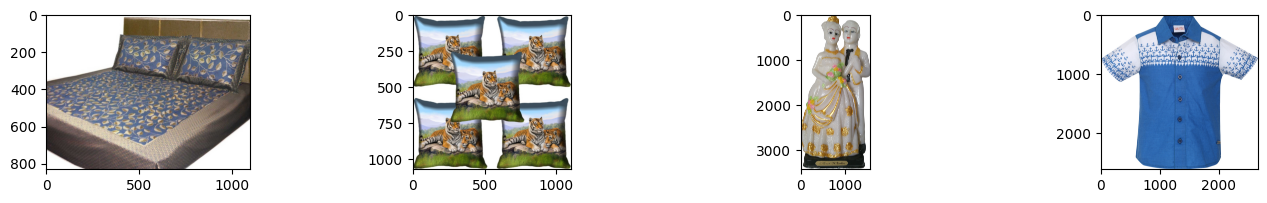

In [25]:
list_labels = data['label_name'].unique().tolist()



#list_cloudy=[data["image_path"][i] for i in range(len(data)) if data["label_name"][i]=="Home and Kitchen Essential"]
#list_rain=[data["image_path"][i] for i in range(len(data)) if data["label_name"][i]=="Baby and Personal Care"]
#list_shine=[data["image_path"][i] for i in range(len(data)) if data["label_name"][i]=="Electronics and Accessories"]
#list_sunrise=[data["image_path"][i] for i in range(len(data)) if data["label_name"][i]=="Festive and Special Occasion"]

for name in list_labels:
    print(name)
    plt.figure(figsize = (17, 2))
    for i in range(len(list_labels)):
        plt.subplot(140 + 1 + i)
        filename = fonctions.list_fct(data, name)[i + 10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

# Etape 1 : étude de faisabilité

## Création du modèle pré-entraîné

In [26]:
base_model = VGG16()
model = Model(inputs = base_model.inputs, outputs = base_model.layers[-2].output)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Création des features des images

In [27]:
images_features = []
i = 0 
for image_file in data['image_path']:
    if i % 100 == 0:
        print(i)
    i +=1
    image = load_img(image_file, target_size = (224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis = 0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose = 0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
images_features.shape

0
100
200
300
400
500
600


(658, 4096)

## Réduction dimension et analyse

### Réduction de dimension PCA

In [28]:
print(images_features.shape)
pca = decomposition.PCA(n_components = 0.99)
feat_pca = pca.fit_transform(images_features)
print(feat_pca.shape)

(658, 4096)
(658, 539)


### Réduction de dimension T-SNE et affichage des images selon vraies classes

In [29]:
temps1 = time.time()

tsne = manifold.TSNE(n_components = 2, perplexity = 30, n_iter = 2000, init = 'random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time() - temps1
print('temps de T-SNE : ', '%15.2f' % duration1, 'secondes')

temps de T-SNE :             2.86 secondes


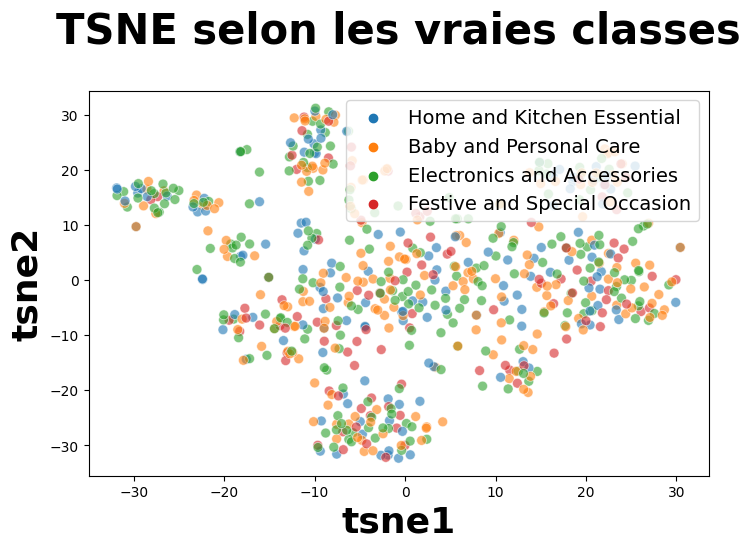

In [30]:
df_tsne = pd.DataFrame(X_tsne, columns = ['tsne1', 'tsne2'])
df_tsne['class'] = data['label_name']

plt.figure(figsize = (8, 5))
sns.scatterplot(
    x = 'tsne1',
    y = 'tsne2',
    hue = 'class',
    palette = sns.color_palette('tab10', n_colors = 4),
    s = 50,
    alpha = 0.6,
    data = df_tsne,
    legend = 'brief'
    )

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop = {'size': 14})
plt.show()

* L'analyse graphique montre visuellement qu'il est réalisable de séparer automatiquement les images selon leurs vraies classes
* Ceci suffit à démontrer la faisabilité de réaliser ultérieurement une classification supervisée pour déterminer automatiquement les classes des images
* Cette étape 1 est très rapide à mettre en oeuvre. Une conclusion négative sur la faisabilité aurait éviter de réaliser des traitements beaucoup plus lourd de classification supervisée
* Cette démarche en 2 étapes (1. Faisabilité, 2. Classification supervisée si étape 1 OK) s'inscrit dans une démarche agile de tout projet Data

### Création de clusters à partir du T-SNE et affichage des images selon clusters
* Attention : ici, il ne s'agit pas de faire une classification non supervisée, mais simplement, par une mesure de l'ARI, de conforter l'analyse graphique précédente qui démontre la faisabilité de réaliser ultérieurement une classification supervisée. Cette mesure de l'ARI nécessite de créer des clusters théoriques via KMeans
* Il s'agit donc de réaliser une mesure de ce que nous voyons graphiquement, donc à partir des données en sortie du t-sne
* Pour réaliser une classification non supervisée, il aurait fallu repartir des données avant t-sne
* Dans la démarche en 2 étapes, il n'est pas utile de réaliser une classification non supervisée, une classification supervisée est bien plus performante. Même le calcul de l'ARI n'est pas indispensable, nous pourrions passer directement du graphique t-sne précédent à l'étape 2 de classification supervisée
* Il n'est donc pas utile de passer du temps à optimiser l'ARI, un ordre de grandeur suffit pour conforter le 1er graphique t-sne. D'ailleurs la meilleure solution de feature engineering ne génère pas toujours le meilleur ARI. L'analyse graphique t-sne est bien plus riche d'enseignement


In [31]:
cls = cluster.KMeans(n_clusters = 4, n_init = 100)
cls.fit(X_tsne)

KMeans(n_clusters=4, n_init=100)

In [32]:
df_tsne['cluster'] = cls.labels_
df_tsne

,tsne1,tsne2,class,cluster
0,1.961488,-4.030423,Home and Kitchen Essential,3
1,19.631865,11.461578,Baby and Personal Care,1
2,22.486670,4.792628,Baby and Personal Care,1
3,13.049973,-14.844379,Home and Kitchen Essential,2
4,-0.720054,-32.379498,Home and Kitchen Essential,2
...,...,...,...,...
653,19.237055,18.282991,Festive and Special Occasion,1
654,23.868597,21.052563,Festive and Special Occasion,1
655,17.823744,5.790074,Festive and Special Occasion,1
656,-7.994148,29.974649,Home and Kitchen Essential,0


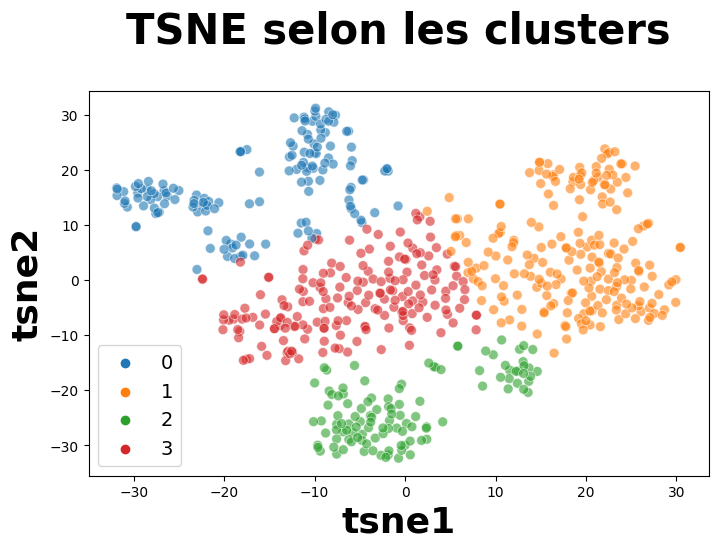

In [33]:
plt.figure(figsize = (8, 5))
sns.scatterplot(
    x = 'tsne1',
    y = 'tsne2',
    hue = 'cluster',
    palette = sns.color_palette('tab10', n_colors = 4),
    s = 50,
    alpha = 0.6,
    data = df_tsne,
    legend = 'brief'
    )

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop = {'size': 14}) 
plt.show()

In [34]:
labels = data['label']
print('ARI : ', metrics.adjusted_rand_score(labels, cls.labels_))

ARI :  -0.0012758999942228382


In [35]:
# Analyse d'image "shine" affectées au cluster 3 "cloudy"
# hein ?????

list_shine_0 = [i for i in range(len(data['image_path'])) \
                if (data.iloc[i]['label_name'] == 'Baby and Personal Care') and (df_tsne.iloc[i]['cluster'] == 3)]
list_shine_0[0]

40

tsne1                         -2.127569
tsne2                        -32.223804
class      Festive and Special Occasion
cluster                               2
Name: 220, dtype: object


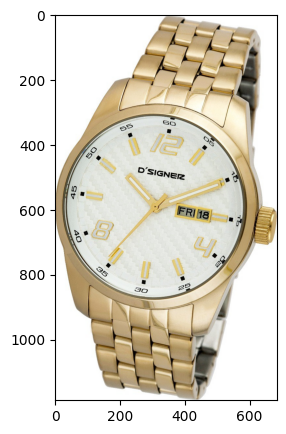

In [36]:
# Affichage image "shine" considérée comme "cloudy"
id = 220 ### A VERIFIER
print(df_tsne.iloc[id])
fig = plt.figure(figsize = (8, 5))
# plt.subplot(130 + 1 + i)
filename = data['image_path'][id]
image = imread(filename)
plt.imshow(image)
plt.show()

* Analyse : le modèle pré-entraîné confond "cloud" avec de la neige ...

### Analyse par classes

In [37]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[43 66 32 56]
 [58 68 37 56]
 [12 33 22 35]
 [32 46 23 39]]


In [38]:
cls_labels_transform = fonctions.conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)

Correspondance des clusters :  [1 1 1 0]
[[ 56 141   0   0]
 [ 56 163   0   0]
 [ 35  67   0   0]
 [ 39 101   0   0]]


In [39]:
print(metrics.classification_report(labels, cls_labels_transform))

              precision    recall  f1-score   support

           0       0.30      0.28      0.29       197
           1       0.35      0.74      0.47       219
           2       0.00      0.00      0.00       102
           3       0.00      0.00      0.00       140

    accuracy                           0.33       658
   macro avg       0.16      0.26      0.19       658
weighted avg       0.21      0.33      0.24       658



In [40]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels], columns = [i for i in '0123'])
df_cm

,0,1,2,3
Home and Kitchen Essential,56,141,0,0
Baby and Personal Care,56,163,0,0
Electronics and Accessories,35,67,0,0
Festive and Special Occasion,39,101,0,0


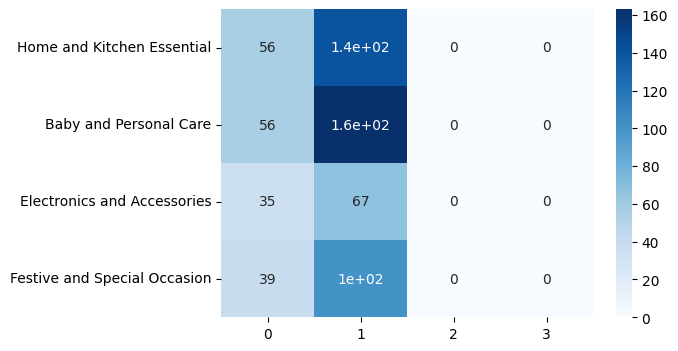

In [41]:
# modifier format annotations
plt.figure(figsize = (6, 4))
sns.heatmap(df_cm, annot = True, cmap = 'Blues')
plt.show()

# Etape 2 : classification supervisée
4 approches sont présentées :
* Une approche simple par préparation initiale de l'ensemble des images avant classification supervisée
* Une approche par data generator, permettant facilement la data augmentation. Les images sont directement récupérées à la volée dans le repertoire des images
* Une approche récente proposée par Tensorflow.org par DataSet, sans data augmentation
* Une approche par  DataSet, avec data augmentation intégrée au modèle : layer en début de modèle


## Création du modèle de classification

In [ ]:
# cf fichier fonctions.py

## Approche préparation initiale des images

In [42]:
images_np = fonctions.image_prep_fct(data)
images_np

(658, 224, 224, 3)


In [ ]:
images_np.shape

In [43]:
data_test.reset_index(drop = True, inplace = True)
data_test

In [45]:
images_np_test = fonctions.image_prep_fct(data_test)
images_np_test

(350, 224, 224, 3)


In [ ]:
images_np_test.shape

In [46]:
X = images_np
X

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
y = to_categorical(data['label'])
y

In [ ]:
X_test = images_np_test
X_test

In [47]:
y_test = to_categorical(data_test['label'])
y_test

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [50]:
# Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)
X_train.shape

(493, 224, 224, 3)

In [51]:
X_test.shape

(350, 224, 224, 3)

In [ ]:
# Création du modèle
with tf.device('/gpu:0'):
    model1 = fonctions.create_model_fct()

In [52]:
# Création du callback
model1_save_path1 = './model1_best_weights.h5'
checkpoint = ModelCheckpoint(model1_save_path1, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
callbacks_list = [checkpoint, es]

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [53]:
# Entraîner sur les données d'entraînement (X_train, y_train)
with tf.device('/gpu:0'):
    history1 = model1.fit(X_train, y_train, epochs = 50, batch_size = 64, callbacks = callbacks_list, validation_data = (X_val, y_val), verbose = 1)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 10.2695 - accuracy: 0.3063
Epoch 1: val_loss improved from inf to 4.29480, saving model to ./model1_best_weights.h5
8/8 [==============================] - 67s 9s/step - loss: 10.2695 - accuracy: 0.3063 - val_loss: 4.2948 - val_accuracy: 0.2364
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 6.4459 - accuracy: 0.2961
Epoch 2: val_loss improved from 4.29480 to 3.77819, saving model to ./model1_best_weights.h5
8/8 [==============================] - 94s 12s/step - loss: 6.4459 - accuracy: 0.2961 - val_loss: 3.7782 - val_accuracy: 0.2545
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 4.1347 - accuracy: 0.3367 
Epoch 3: val_loss improved from 3.77819 to 3.63993, saving model to ./model1_best_weights.h5
8/8 [==============================] - 104s 13s/step - loss: 4.1347 - accuracy: 0.3367 - val_loss: 3.6399 - val_accuracy: 0.2909
Epoch 4/50
8/8 [==============================] - ETA: 0s - lo

In [54]:
# Score du dernier epoch
loss, accuracy = model1.evaluate(X_train, y_train, verbose = True)
print('Training Accuracy: {:.4f}'.format(accuracy))

loss, accuracy = model1.evaluate(X_val, y_val, verbose = True)
print('Validation Accuracy: {:.4f}'.format(accuracy))

16/16 [==============================] - 73s 5s/step - loss: 0.2329 - accuracy: 0.9655
Training Accuracy: 0.9655
6/6 [==============================] - 24s 4s/step - loss: 2.5245 - accuracy: 0.2242
Validation Accuracy: 0.2242


In [55]:
# Score de l'epoch optimal
model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_val, y_val, verbose = False)
print('Validation Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model1.evaluate(X_test, y_test, verbose = False)
print('Test Accuracy : {:.4f}'.format(accuracy))

Validation Accuracy : 0.2364


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/opt/homebrew/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/homebrew/lib/python3.11/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/homebrew/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 728, in start
      self.io_loop.start()
    File "/opt/homebrew/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/opt/homebrew/Cellar/python@3.11/3.11.3/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/opt/homebrew/Cellar/python@3.11/3.11.3/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
      handle._run()
    File "/opt/homebrew/Cellar/python@3.11/3.11.3/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/homebrew/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/opt/homebrew/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/opt/homebrew/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/opt/homebrew/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/opt/homebrew/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/homebrew/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/homebrew/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/opt/homebrew/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/opt/homebrew/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/homebrew/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/homebrew/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/homebrew/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/25/zpz2d5854t9dmz5yzvnmvznc0000gn/T/ipykernel_27106/2996435354.py", line 7, in <module>
      loss, accuracy = model1.evaluate(X_test, y_test, verbose = False)
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py", line 2200, in evaluate
      logs = test_function_runner.run_step(
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py", line 4000, in run_step
      tmp_logs = self._function(dataset_or_iterator)
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py", line 1972, in test_function
      return step_function(self, iterator)
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py", line 1956, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py", line 1944, in run_step
      outputs = model.test_step(data)
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py", line 1852, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "/opt/homebrew/lib/python3.11/site-packages/keras/src/backend.py", line 5566, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[32,4] labels_size=[32,5]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_test_function_48747]

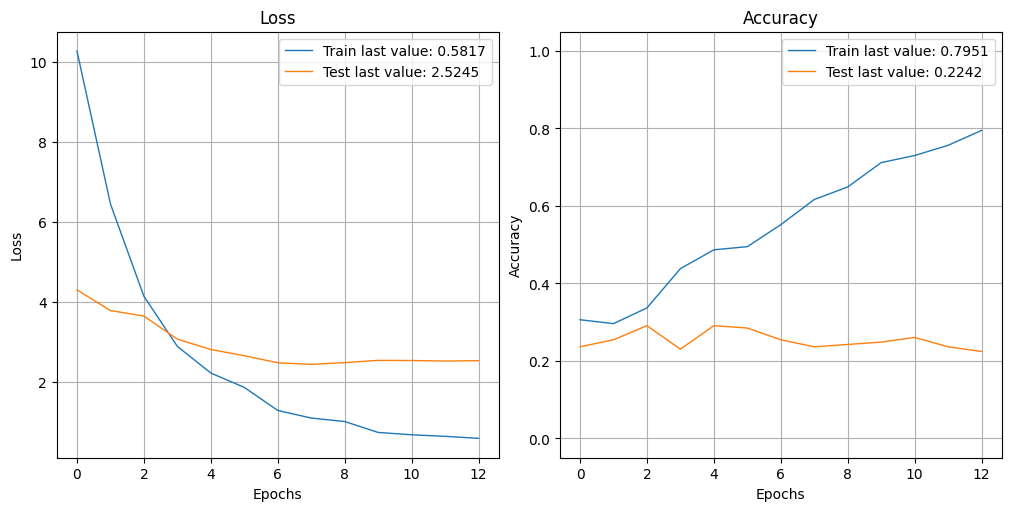

In [56]:
show_history(history1)
plot_history(history1, path = 'standard.png')
plt.close()

In [57]:
y_val_num = np.argmax(y_val, axis = 1)
print(y_val_num)

[1 0 0 1 0 0 3 0 3 3 0 0 3 0 2 1 0 2 0 1 3 3 2 3 2 0 0 2 1 2 2 1 1 0 1 1 3
 2 3 1 0 1 0 3 2 1 0 1 2 1 0 0 1 0 2 1 2 1 3 3 1 1 0 1 1 3 2 1 1 3 3 1 3 0
 1 3 0 3 1 1 0 1 2 1 0 3 3 0 3 0 2 1 0 3 3 1 1 2 0 1 1 3 1 0 0 1 1 2 0 1 1
 3 0 1 1 1 1 0 1 1 3 3 3 1 0 0 2 3 1 0 1 0 3 1 0 0 2 1 0 3 0 3 0 0 0 2 0 1
 2 1 0 2 1 1 0 1 2 3 0 3 2 2 3 2 0]


In [58]:
y_val_pred = np.argmax(model1.predict(X_val), axis = 1)
print(y_val_pred)

6/6 [==============================] - 15s 2s/step
[3 2 1 0 1 1 1 1 0 1 2 1 0 1 0 0 1 3 0 2 0 3 1 0 0 1 2 0 3 0 2 3 2 1 0 3 3
 1 1 0 3 2 1 1 0 2 3 1 2 3 1 1 1 1 2 3 0 3 1 0 2 0 1 0 1 3 1 3 0 2 0 0 3 2
 3 1 0 1 0 0 0 0 0 2 0 2 0 1 1 1 1 1 3 0 0 0 0 1 0 2 3 3 3 3 2 1 0 1 1 1 1
 1 2 1 1 2 2 0 0 1 1 3 2 0 0 0 3 1 3 2 1 1 1 0 1 1 1 2 0 3 3 0 0 1 0 1 0 1
 1 1 0 0 1 1 1 1 0 1 3 0 1 3 1 0 1]


In [59]:
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
print(conf_mat)

[[13 23  7  6]
 [17 16 10 12]
 [10 10  3  3]
 [11 14  3  7]]


In [60]:
y_val_pred_transform = fonctions.conf_mat_transform(y_val_num, y_val_pred)
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)
print(conf_mat)

Correspondance des clusters :  [1 0 1 1]
[[23 26  0  0]
 [16 39  0  0]
 [10 16  0  0]
 [14 21  0  0]]


In [61]:
print(metrics.classification_report(y_val_num, y_val_pred_transform))

              precision    recall  f1-score   support

           0       0.37      0.47      0.41        49
           1       0.38      0.71      0.50        55
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00        35

    accuracy                           0.38       165
   macro avg       0.19      0.29      0.23       165
weighted avg       0.24      0.38      0.29       165



In [62]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels], columns = [i for i in '0123'])
df_cm

,0,1,2,3
Home and Kitchen Essential,23,26,0,0
Baby and Personal Care,16,39,0,0
Electronics and Accessories,10,16,0,0
Festive and Special Occasion,14,21,0,0


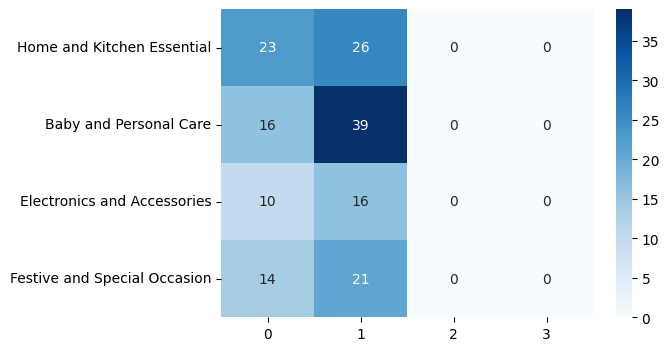

In [63]:
plt.figure(figsize = (6, 4))
sns.heatmap(df_cm, annot = True, cmap = 'Blues')
plt.show()

* Les images "shine" contenant de la neige sont désormais bien affectées à "shine" et non pas "cloud"

## Approche ImageDatagenerator avec data augmentation

CF https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow (noté désormais comme "deprecated", incite à utiiser l'approche suivante)

In [64]:
# Pour mélanger les images, classées initalement par classe
data = data.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [65]:
data['label_name'].unique()

array(['Home and Kitchen Essential', 'Baby and Personal Care',
       'Electronics and Accessories', 'Festive and Special Occasion'],
      dtype=object)

In [66]:
data

,image_path,label_name,label
0,../../data/Images/146b0d570d5ab4e27629d48533b7...,Home and Kitchen Essential,3
1,../../data/Images/e40e9b4ae48e452dc407d299b467...,Baby and Personal Care,0
2,../../data/Images/fce2bd96b35d531a4784bc57e19a...,Electronics and Accessories,1
3,../../data/Images/463492671c5c19316a0fb9fe1c53...,Home and Kitchen Essential,3
4,../../data/Images/e33795f66b2a42ac56095ae704ab...,Baby and Personal Care,0
...,...,...,...
653,../../data/Images/1dbe1f3ba28460dffef4a1d66454...,Home and Kitchen Essential,3
654,../../data/Images/d7fded8e211b3033e424fb450b97...,Home and Kitchen Essential,3
655,../../data/Images/cd71b07a1d37a5e2cc04240e8498...,Home and Kitchen Essential,3
656,../../data/Images/b5834f1e97c74d2833dbcb09a3f2...,Baby and Personal Care,0


In [67]:
data = data[data['label_name'].notnull()]

In [68]:
data['label_name'] = data['label_name'].apply(lambda x : x.split(','))

In [69]:
batch_size = 32

In [70]:
data

,image_path,label_name,label
0,../../data/Images/146b0d570d5ab4e27629d48533b7...,[Home and Kitchen Essential],3
1,../../data/Images/e40e9b4ae48e452dc407d299b467...,[Baby and Personal Care],0
2,../../data/Images/fce2bd96b35d531a4784bc57e19a...,[Electronics and Accessories],1
3,../../data/Images/463492671c5c19316a0fb9fe1c53...,[Home and Kitchen Essential],3
4,../../data/Images/e33795f66b2a42ac56095ae704ab...,[Baby and Personal Care],0
...,...,...,...
653,../../data/Images/1dbe1f3ba28460dffef4a1d66454...,[Home and Kitchen Essential],3
654,../../data/Images/d7fded8e211b3033e424fb450b97...,[Home and Kitchen Essential],3
655,../../data/Images/cd71b07a1d37a5e2cc04240e8498...,[Home and Kitchen Essential],3
656,../../data/Images/b5834f1e97c74d2833dbcb09a3f2...,[Baby and Personal Care],0


In [71]:
datagen_train = ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.25,
    preprocessing_function = preprocess_input
    )

train_flow = fonctions.data_flow_fct(batch_size, data, datagen_train, data_type = 'training')
val_flow = fonctions.data_flow_fct(batch_size, data, datagen_train, data_type = 'validation')

datagen_test = ImageDataGenerator(
    validation_split = 0,
    preprocessing_function = preprocess_input)

#test_flow = data_flow_fct(data_test, datagen_test, data_type = None)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:

Found 494 validated image filenames belonging to 4 classes.
Found 164 validated image filenames belonging to 4 classes.


In [73]:
test_flow = fonctions.data_flow_fct(batch_size, data_test, datagen_test, data_type = None)
test_flow

TypeError: If class_mode="categorical", y_col="label_name" column values must be type string, list or tuple.

In [ ]:
data_test

In [ ]:
data_test = data_test[data_test['label_name'].notnull()]
data_test['label_name'] = data_test['label_name'].apply(lambda x : x.split(','))

In [ ]:
datagen_test = ImageDataGenerator(
    validation_split = 0,
    preprocessing_function = preprocess_input)

test_flow = fonctions.data_flow_fct(batch_size, data_test, datagen_test, data_type = None)

In [ ]:
# Création du modèle
with tf.device('/gpu:0'):
    model2 = fonctions.create_model_fct()

# Création du callback
model2_save_path = './model2_best_weights.h5'
checkpoint = ModelCheckpoint(model2_save_path, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
callbacks_list = [checkpoint, es]

In [ ]:
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

In [ ]:
with tf.device('/gpu:0'):
    history2 = model2.fit(
        train_flow,
        validation_data = val_flow,
        batch_size = batch_size,
        epochs = 50,
        callbacks = callbacks_list,
        verbose = 1
        )

In [ ]:
# Score du dernier epoch

loss, accuracy = model2.evaluate(train_flow, verbose = True)
print('Training Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model2.evaluate(val_flow, verbose = True)
print('Validation Accuracy : {:.4f}'.format(accuracy))

In [ ]:
# Score de l'epoch optimal
model2.load_weights(model2_save_path)

loss, accuracy = model2.evaluate(val_flow, verbose = False)
print('Validation Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model2.evaluate(test_flow, verbose = False)
print('Test Accuracy : {:.4f}'.format(accuracy))

In [ ]:
show_history(history2)
plot_history(history2, path = 'standard.png')
plt.close()

## Approche nouvelle par Dataset sans data augmentation

CF https://www.tensorflow.org/tutorials/load_data/images

In [ ]:
batch_size = 32

In [ ]:
dataset_train = fonctions.dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'training')
dataset_val = fonctions.dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'validation')
dataset_test = fonctions.dataset_fct(batch_size, path_test, validation_split = 0, data_type = None)

In [ ]:
# Création du modèle
with tf.device('/gpu:0'):
    model3 = fonctions.create_model_fct()

# Création du callback
model3_save_path = './model3_best_weights.h5'
checkpoint = ModelCheckpoint(model3_save_path, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
callbacks_list = [checkpoint, es]

In [ ]:
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

In [ ]:
with tf.device('/gpu:0'):
    history3 = model3.fit(
        dataset_train,
        validation_data = dataset_val,
        batch_size = batch_size,
        epochs = 50,
        callbacks = callbacks_list,
        verbose = 1
        )

In [ ]:
# Score du dernier epoch

loss, accuracy = model3.evaluate(dataset_train, verbose = True)
print('Training Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model3.evaluate(dataset_val, verbose = True)
print('Validation Accuracy : {:.4f}'.format(accuracy))

In [ ]:
# Score de l'epoch optimal
model3.load_weights(model3_save_path)

loss, accuracy = model3.evaluate(dataset_val, verbose = False)
print('Validation Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model3.evaluate(dataset_test, verbose = False)
print('Test Accuracy : {:.4f}'.format(accuracy))


In [ ]:
show_history(history3)
plot_history(history3, path = 'standard.png')
plt.close()

## Approche nouvelle par Dataset avec data augmentation intégrée au modèle

CF https://www.tensorflow.org/tutorials/images/data_augmentation

In [ ]:
batch_size = 32

In [ ]:
dataset_train = fonctions.dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'training')
dataset_val = fonctions.dataset_fct(batch_size, path, validation_split = 0.25, data_type = 'validation')
dataset_test = fonctions.dataset_fct(batch_size, path_test, validation_split = 0, data_type = None)

In [ ]:
# Création du modèle
with tf.device('/gpu:0'):
    model4 = fonctions.create_model_fct2()

# Création du callback
model4_save_path = './model4_best_weights.h5'
checkpoint = ModelCheckpoint(model4_save_path, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
callbacks_list = [checkpoint, es]

In [ ]:
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))

In [ ]:
with tf.device('/gpu:0'):
    history4 = model4.fit(dataset_train,
                    validation_data = dataset_val,
                    batch_size = batch_size, epochs = 50, callbacks = callbacks_list, verbose = 1)

In [ ]:
# Score du dernier epoch

loss, accuracy = model4.evaluate(dataset_train, verbose = True)
print('Training Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model4.evaluate(dataset_val, verbose = True)
print('Validation Accuracy : {:.4f}'.format(accuracy))

In [ ]:
# Score de l'epoch optimal
model4.load_weights(model4_save_path)

loss, accuracy = model4.evaluate(dataset_val, verbose = False)
print('Validation Accuracy : {:.4f}'.format(accuracy))

loss, accuracy = model4.evaluate(dataset_test, verbose = False)
print('Test Accuracy : {:.4f}'.format(accuracy))


In [ ]:
show_history(history4)
plot_history(history4, path = 'standard.png')
plt.close()